# Visualizing Geo-location clusters

## Import general packages

In [2]:
import pandas as pd

## Read in the Data

In [42]:
dPatron = pd.read_csv("data/patron_latlongs.csv")
dPatron.head(10)

,post_code,lat,long
0,W14,51.499435,-0.218660
1,E5,51.557186,-0.049165
2,SW15,51.464133,-0.222929
3,SE10,51.487122,0.003284
4,NW8,51.535624,-0.181950
5,E18,51.591999,0.026577
6,SW11,51.464566,-0.164692
7,N5,51.554550,-0.102233
8,N15,51.584643,-0.092520
9,SW13,51.471845,-0.248994


## Set initial parameters for map

### Import folium package

In [4]:
import folium
from folium.plugins import MarkerCluster

### Set map parameters

In [5]:

mid_lat = dPatron['lat'].median()

mid_long = dPatron['long'].median()
print(mid_lat)
print(mid_long)

51.519838
-0.1022326


### Test the map

In [43]:
map = folium.Map(location=[mid_lat, mid_long],
                 zoom_start=12,
                 height=700,
                 control_scale=True)
map

## Read lat-long data into marker lists

In [44]:
MarkersList = []
MCList = []

In [8]:
for i, row in dPatron.iterrows():
    
    coords = (row["lat"], row["long"])
    
    try:
        iMC = MarkersList.index(coords) ##-->TODO
    
 
    
    except ValueError:
        MarkersList.append(coords) 
        mc = MarkerCluster().add_to(map)    
        MCList.append(mc) ##-->TODO
       
        iMC = len(MCList)-1
        
    
    folium.Marker(
        location=[coords[0],coords[1]],
        tooltip=row["post_code"] 
    ).add_to(MCList[iMC])
   

## Display the map

In [45]:
map

## Additional Code Snippets for adding to geoclust-patrons-...

In [46]:


folium.Marker(
    location=[mid_lat, mid_long],
    popup="Map Center",
    icon=folium.Icon(icon="cloud",color='red')
).add_to(map)
map

## Adding Markers from DataFrame

In [47]:
for i, row in dPatron.iterrows():
    folium.Marker(
        location=[row["lat"], row["long"]],
        popup=row["post_code"],
        tooltip=row["post_code"]
        ).add_to(map)
map

## K-means clustering of lat longs

In [48]:

type(dPatron['long'])

pandas.core.series.Series

In [49]:
dPatron['long']


0     -0.218660
1     -0.049165
2     -0.222929
3      0.003284
4     -0.181950
         ...   
561   -0.268414
562   -0.215875
563   -0.130763
564    0.013068
565   -0.297937
Name: long, Length: 566, dtype: float64

In [50]:
type(dPatron[['long']])
dPatron[['long']]

,long
0,-0.218660
1,-0.049165
2,-0.222929
3,0.003284
4,-0.181950
...,...
561,-0.268414
562,-0.215875
563,-0.130763
564,0.013068


### Elbow Method

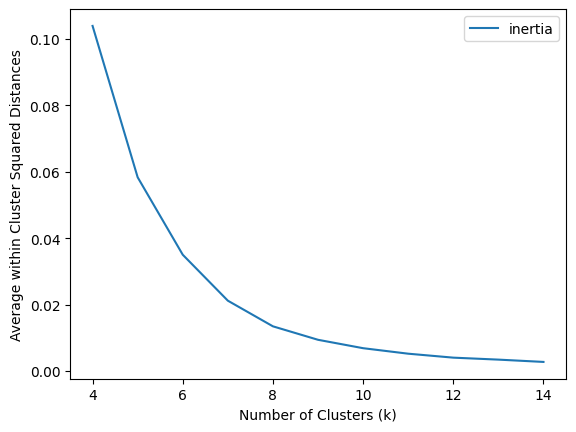

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  

plt.rcdefaults()
inertia = []
clrange = range(4,15)    
for nc in clrange:
    kmeans = KMeans(n_clusters=nc, random_state=751).fit(dPatron[['long']])
    inertia.append(kmeans.inertia_ / nc)

d_inertia = pd.DataFrame({'n_clusters': clrange,
                          'inertia':inertia})

ax = d_inertia.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average within Cluster Squared Distances')
plt.show()



In [55]:
dPatron.info()

km = KMeans(n_clusters=12).fit(dPatron.iloc[:,1:3])


dPatron['cluster'] = km.labels_
dPatron.head()


dClusters = pd.DataFrame(km.cluster_centers_,
                         columns=['lat_cent','long_cent']
            )
dClusters.reset_index(inplace=True)


dClusters.rename(columns = {'index':'cluster'}, inplace=True)
dClusters



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   post_code  566 non-null    object 
 1   lat        566 non-null    float64
 2   long       566 non-null    float64
 3   cluster    566 non-null    int32  
dtypes: float64(2), int32(1), object(1)
memory usage: 15.6+ KB


,cluster,lat_cent,long_cent
0,0,51.523180,-0.290405
1,1,51.568386,-0.089024
2,2,51.472332,0.006426
3,3,51.488344,-0.083347
4,4,51.571702,0.012228
5,5,51.465230,-0.168759
6,6,51.590651,-0.228316
7,7,51.448274,-0.250630
8,8,51.428674,-0.072659
9,9,51.615412,-0.138698


### Visualizing the K clusters

In [56]:

MCList = [] 
map = folium.Map(location=[mid_lat, mid_long],
                 zoom_start=12,
                 height=700,
                 control_scale=True)
map

#### ADD MARKERCLUSTER objects to map

In [57]:
for i, row in dClusters.iterrows():
    mc = MarkerCluster(name=row['cluster']).add_to(map)
    MCList.append(mc)


#### TODO: EXPLAIN THIS LOOP IN COMMENTARY
In this loop we are adding clusters to names to the cluster group and adding it to the map. But, we don't get anything because we need to add cluster markers to the map to see it.

In [58]:

for i, row in dPatron.iterrows():
     folium.Marker(
         location=[row['lat'],row['long']],
         tooltip=row["post_code"]
     ).add_to(MCList[row['cluster']])


map

#### TODO: WHY did we add_to MCList[row['cluster']]? Why not add_to(map)?
We used MClist because we want to add all the points to the marker cluster list to be displayed. If we add the point directly to the map the markers will not appear.

In [59]:
map.save("patrons_km_clusters0083.html")

### TODO

#### TODO: WHAT DATA DO WE FIT THE KMEANS OBJECT TO?
We used 751 as random seed

#### TODO: WHAT NUMBER OF CLUSTERS ARE WE HAPPY WITH?
We are happy with 12 clusters

#### 1. Why did we reset_index?
We reset the index to have a freshstart of the map and remove any unwanted markers

#### 2. Why did we use 'inplace' parameter?
We use inplace to replace the previous variables with the new ones